In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

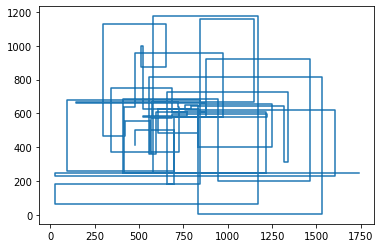

In [39]:
coords = pd.read_csv('tsp.csv', header=None).values[:, 1:]

result = np.random.permutation(coords.shape[0])#random permutation

plt.figure()
plt.step(coords[result][:,0], coords[result][:,1])
plt.show()

# Задание

1) Реализуйте алгоритм Hill Climb.

2) Реализуйте генетический алгоритм.

In [31]:
def get_dist(perm):
    s = 0
    x0 = coords[perm[0]][0]
    y0 = coords[perm[0]][1]
    for i in perm[1:]:
        s += np.abs(coords[i][0] - x0) + np.abs(coords[i][1] - y0)
        x0, y0 = coords[i]
    return s

In [38]:
from copy import copy
NUM_ITER = 1000
N = coords.shape[0]
D = get_dist(result)
for n_i in np.arange(1, NUM_ITER + 1):
    print(str(n_i) + ': D = ', D)
    permto = None
    mind = 10000000000
    
    for i in range(N):
        for j in range(i + 1, N):
            r = copy(result)
            r[i], r[j] = r[j], r[i]
            d = get_dist(r)
            if d < mind:
                #print('mind = ', mind)
                mind = d
                permto = copy(r)
    if D <= mind:
        break
    D = mind
    result = permto
    #print(result)

1: D =  34935
2: D =  32565
3: D =  30315
4: D =  28645
5: D =  27105
6: D =  25785
7: D =  24605
8: D =  23625
9: D =  22735
10: D =  21865
11: D =  21135
12: D =  20445
13: D =  19790
14: D =  19210
15: D =  18570
16: D =  18100
17: D =  17720
18: D =  17450
19: D =  17100
20: D =  16790
21: D =  16485
22: D =  16235
23: D =  16025
24: D =  15835
25: D =  15695
26: D =  15555
27: D =  15445
28: D =  15345
29: D =  15265
30: D =  15185
31: D =  15125
32: D =  15065
33: D =  15015
34: D =  14975
35: D =  14945
36: D =  14715
37: D =  14485
38: D =  14295
39: D =  14155
40: D =  14105
41: D =  14085
42: D =  13715
43: D =  13635
44: D =  13525
45: D =  13445
46: D =  13365
47: D =  13355
48: D =  13095
49: D =  13065
50: D =  13005
51: D =  12995
52: D =  12365
53: D =  12235
54: D =  12225
55: D =  12215


In [42]:
generate = []
for i in range(10000):
    result = np.random.permutation(coords.shape[0])#random permutation
    generate .append(result)
print(len(generate))

10000


In [45]:
generate = sorted(generate, key = get_dist)

In [ ]:
def skr(x, y):
    a = np.random.randint(0, coords.shape[0])
    b = a
    while b == a:
        b = np.random.randint(0, coords.shape[0])
    if a > b:
        a, b = b, a
    ans = [0] * len(x)
    ans[a:b + 1] = x[a:b + 1]
    id = 0
    for i in range(len(y)):
        if id == a:
            break
        if y[i] in ans[:id] or y[i] in ans[a:b+1]:
            continue
        ans[id] = y[i]
        id += 1
    id = b + 1
    for i in range(len(y)):
        if id == len(y):
            break
        if y[i] in ans[:id]:
            continue
        ans[id] = y[i]
        id += 1

In [46]:
for G in range(100):
    a = np.random.randint(0, coords.shape[0])
    b = a
    while b == a:
        b = np.random.randint(0, coords.shape[0])
    

28770
29425
29805
29890
30155
